In [1]:
from numpy.linalg import norm, eigvals
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 1
Hacer un programa que reciba una matriz A ∈ R n×n y un entero positivo k y que aplique k iteraciones del método de la potencia con un vector aleatorio inicial v ∈ R n. El programa debe devolver un vector a ∈ R k
, donde ai sea la aproximación al autovalor obtenida en el paso i.

In [2]:
def coef_rayleigh(A, v):
    return (v.T@A@v)/(v.T@v)

def metodo_de_la_potencia(A, k):
    n = A.shape[0]
    v = np.random.rand(n)
    
    a = []
    for i in range(k):
        v = A@v
        v /= norm(v, 2)
        r = coef_rayleigh(A,v)
        a.append(r)
    
    return a

### Ejercicio 2

Tomar una matriz A ∈ R 100×100 de coordenadas aleatorias y utilizar el programa para realizar 100 iteraciones del método.

In [3]:
A = np.random.rand(100,100)
l100 = metodo_de_la_potencia(A, 100)

Graficar las aproximaciones obtendidas en función del número de iteraciones.

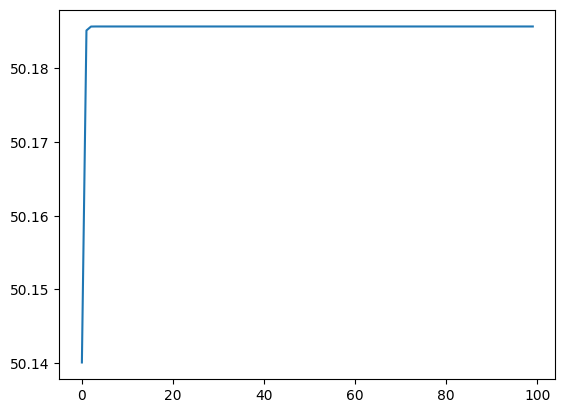

In [4]:
plt.plot(l100)

***¿Considera que el método converge rápidamente?***

El metodo converge muy rapidamente. De hecho **en la primera iteracion** ya obtenemos un valor bastante cercano al autovalor.

### Ejercicio 3

---

#### Funciones Auxiliares:

In [5]:
def avals_modulo_maximo(A):
    return sorted(eigvals(A), key=lambda l: abs(l), reverse=True)

def calcular_errores(A, ls):
    l_max = avals_modulo_maximo(A)[0]
    errores = [abs(l_max - ai) for ai in ls]
    return errores

def analisis_con_graficos(A, ls, errores, K=None):
    #Ploteo Error
    plt.figure(figsize=(5,5))
    plt.plot(errores)
    titulo = f"Error vs numero de iteracion para K={K}" if K else "Error vs numero de iteracion"
    plt.title(titulo)

    #Ploteo Logaritmo del Error
    plt.figure(figsize=(5,5))
    
    log_errores = np.log(errores)
    plt.plot(log_errores)
    titulo = f"Log Error vs numero de iteracion para K={K}" if K else "Log Error vs numero de iteracion"
    plt.title(titulo)
    
    e0 = errores[0]
    l1, l2 = np.abs(avals_modulo_maximo(A)[:2]) #Sera necesario usar los valores absolutos?
    y = [2*np.log(l2/l1)*x + np.log(e0) for x in range(100)]

    #Quiero que el eje Y vaya desde -e0 hasta e0. Uso min para que se vea todo el grafico si no entra.
    plt.ylim(min(-e0, log_errores[-1] - 1), e0)
    plt.plot(y)

    plt.legend(["Logaritmo del Error", "2*log(l2/l1) + log(e0)"])

---

#### Enunciados:

**A)**  una matriz C ∈ R 100×100 de coordenadas aleatorias y considerar la matriz simétrica A = (1/2)*(C +C.T) (veremos próximamente que es una forma de asegurarnos una matriz con todos sus autovalores reales).
Definir B = A + 500I y aplicar 100 pasos del método de la potencia a B

In [6]:
C = np.random.rand(100,100)
A = (1/2)*(C+C.T)
B = A + 500*np.eye(100)

l100 = metodo_de_la_potencia(B, 100)
errores = calcular_errores(B, l100)

**B)** Llamamos $\lambda_{max}$ al autovalor de mayor módulo de B y definimos el vector de errores $e \in R^{100}$ :

$e_i = |\lambda_{max} − a_i|$

Graficar los errores en función del número de iteración ¿Puede decir que función es?

**C)** Graficar $\log(e_i)$ y volver a pensar el ítem (b). Sabiendo que el factor por el que se multiplica el error es aproximadamente $(\lambda_2/\lambda_1)^2$, la pendiente de la recta obtenida debería ser aproximadamente $2\cdot \log(\lambda_2/\lambda_1)$.
Para comparar los valores obtenidos experimentalmente, en el mismo gráfico representar la función 

$y(x) = 2\cdot \log(\lambda_{2}/\lambda_{1})\cdot x + \log(e_0)$.

#### Resolución:

Es una funcion exponencial. Al principio puede no ser tan evidente pero al tomarle logaritmo nos queda algo lineal.

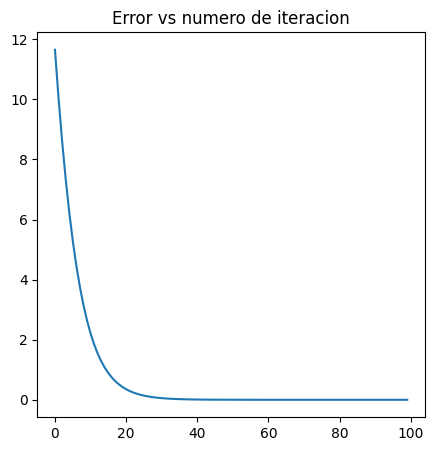

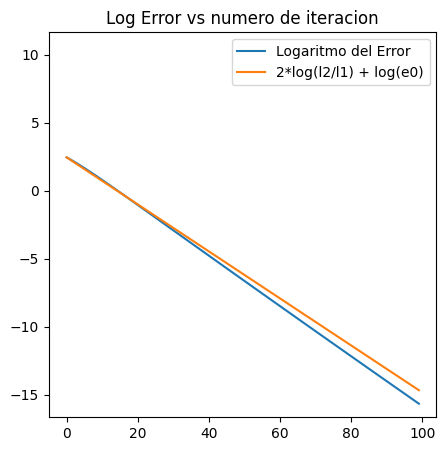

In [ ]:
analisis_con_graficos(B, l100, errores)

---

### Ejercicio 4

Repetir el experimento utilizando B = A + KI, para K = 1000, K = 2000 y K = 5000.
¿Por qué la velocidad de convergencia disminuye?

#### Resolución:

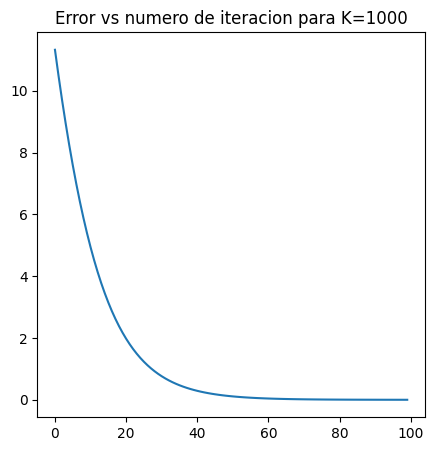

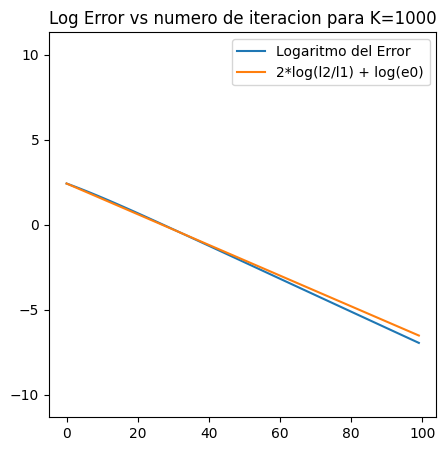

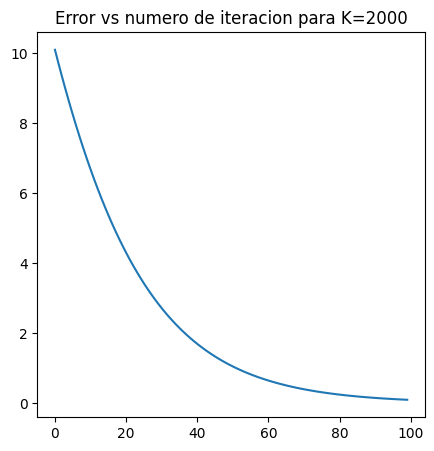

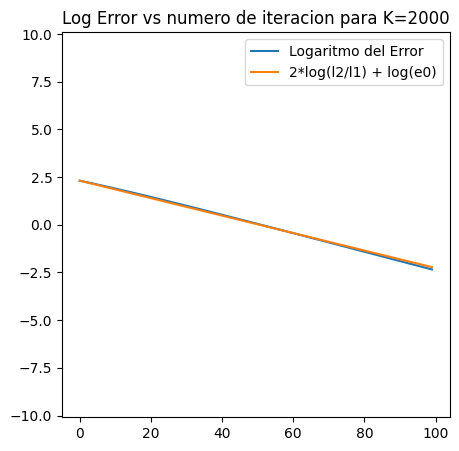

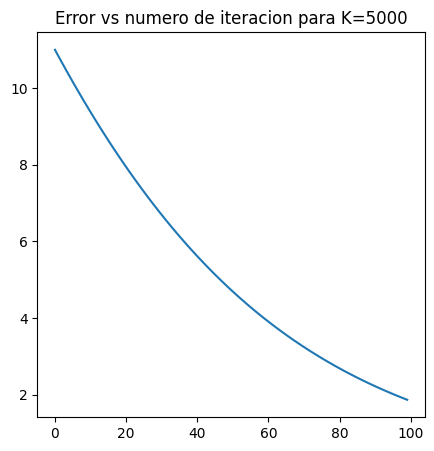

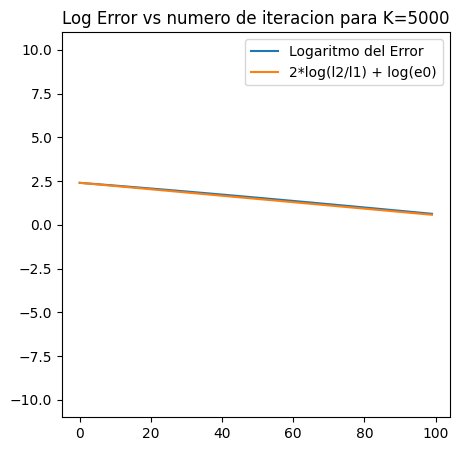

In [ ]:
C = np.random.rand(100,100)
A = (1/2)*(C+C.T)

for K in [1000, 2000, 5000]:
    B = A + K*np.eye(100)

    l100 = metodo_de_la_potencia(B, 100)    
    errores = calcular_errores(B, l100)
    
    analisis_con_graficos(B, l100, errores, K)

##### ¿Por qué la velocidad de convergencia disminuye?

Sabemos que $\lambda + K$ es autovalor de $A + K \cdot I $.

A medida que $K$ es mas grande, la diferencia relativa entre los autovalores de $A + K \cdot I $ se hace muy chica, por lo que $\left(\frac{\lambda _{2}}{\lambda _{1}}\right)^{k}$ se aproxima a 0 mas lentamente, cuando $k$ tiende a infinito.

Asimismo por como funciona el metodo de la potencia, la iteración $k$ es de la forma: $A^kv = a_1\cdot\lambda_1^k \cdot v_1 + a_2\cdot\lambda_2^k \cdot v_2 + ...+ a_n\cdot\lambda_n^k \cdot v_n$, y si sacamos factor comun $\lambda_1^k$ (autovalor de modulo maximo), obtenemos:

$A^{k} v=\lambda _{1}^{k} \ \left( a_{1} \cdot v_{1} +a_{2} \cdot \left(\frac{\lambda _{2}}{\lambda _{1}}\right)^{k} \cdot v_{2} +...+a_{n} \cdot \left(\frac{\lambda _{n}}{\lambda _{1}}\right)^{k} \cdot v_{n}\right)$

De esta manera podemos usar el cociente de Rayleigh para obtener el autovalor $\lambda_1$ con un error que va a ser proporcinal a lo que llamamos epsilon k:

$\epsilon_k = (a_{2} \cdot \left(\frac{\lambda _{2}}{\lambda _{1}}\right)^{k} \cdot v_{2} +...+a_{n} \cdot \left(\frac{\lambda _{n}}{\lambda _{1}}\right)^{k} \cdot v_{n})$

Y por lo que vimos antes, $\epsilon_k$ tiende a 0 lentamente si $K$ es un numero muy grande.